# Syarah.com Analytics: Saudi Arabia Used Car Dealer
#### Created By: Annisa Wardhani

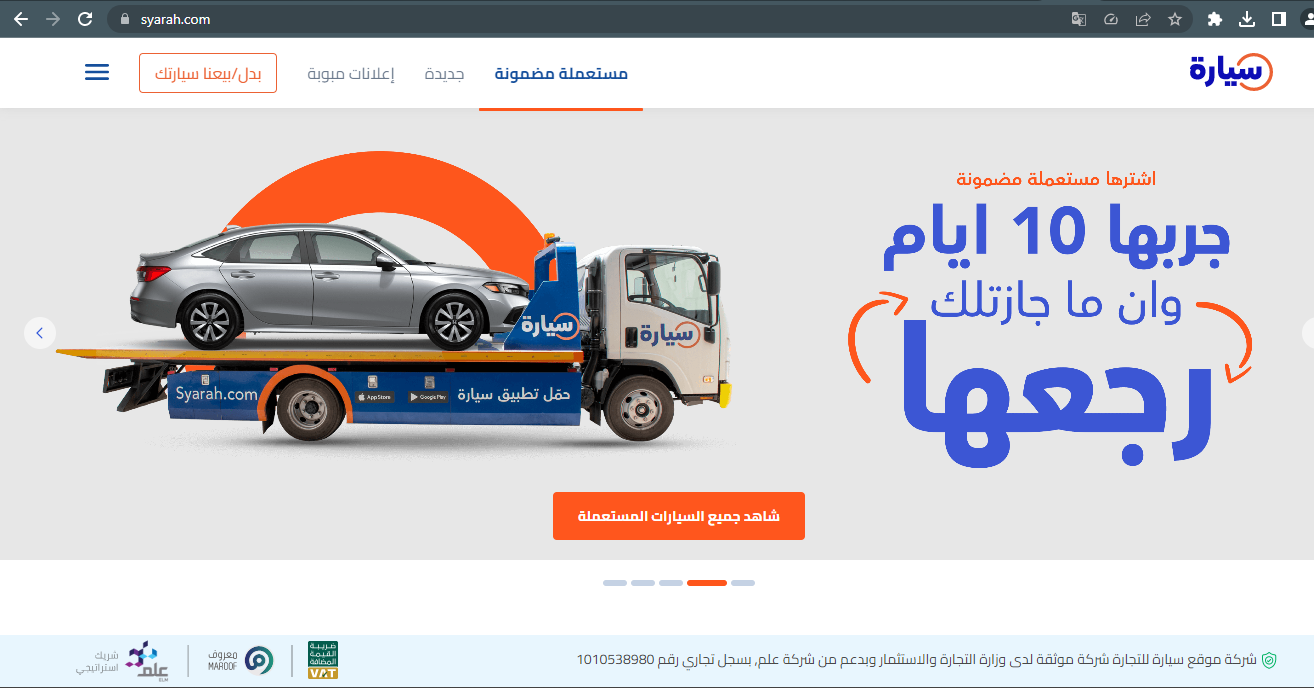

# Contents
1. Business Problem Understanding
2. Data Understanding
3. Data Cleaning
4. Data Preprocessing
5. Modeling
6. Conclusion
7. Recommendation

# Business Problem Understanding

### Context
Melansir situs *inews.com*, *tribunnews.com*, dan beberapa situs berita, Arab Saudi merupakan salah satu negara dengan tingkat perekonomian tinggi dan dikenal sebagai pengekspor dan penghasil minyak bumi terbesar di dunia sehingga harga bahan bakar kendaraan bermotor di Arab Saudi murah. Akibatnya, banyak orang di Arab Saudi mampu membeli mobil. Pajak kendaraan bermotor di Arab Saudi tidak mahal. Hal tersebut adalah alasan mengapa di Arab Saudi banyak terjadi jual beli mobil dan orang miskin pun mampu membeli mobil.  

**[Syarah.com](https://syarah.com)** adalah salah satu situs jual beli mobil bekas. Perusahaan *Syarah* melakukan interaksi dengan calon pembeli mobil bekas (*used car*) dan juga berinteraksi dengan pemilik mobil bekas yang akan menjual mobilnya. Selain beroperasi secara online, perusahaan ini juga sudah beroperasi secara langsung di 10+ kota yang berada di negara Arab Saudi. Perusahaan *Syarah.com* cukup popular di beberapa negara lain sehingga mobil-mobil bekas yang dijual di situs tidak hanya berasal dari Arab Saudi.  

Pemilik mobil bekas dapat menjual mobil dan mengajukan harga kepada *Syarah.com*. Lalu, perusahaan dapat bernegoisasi dengan pemilik mobil dan menentukan harga jual mobil bekas di situs. Penentuan harga mobil di situs cukup sulit agar tetap menguntungkan pemilik mobil dan menguntungkan perusahaan. Jika harga terlalu mahal dibandingkan mobil-mobil bekas lain dengan fitur sejenis di area yang sama ataupun *online* tetapi pembeli mobil sedikit. Jika harga terlalu murah, baik pemilik mobil maupun perusahaan tidak akan mendapatkan keuntungan yang sepadan. Hal tersebut karena banyak faktor yang memengaruhi harga suatu mobil bekas. Oleh sebab itu, perusahaan *Syarah.com* perlu memahami faktor-faktor yang dapat menghasilkan profit.

### Problem Statement
Salah satu tantangan bagi perusahaan *Syarah.com* adalah pemecahan masalah untuk dapat memiliki model bisnis yang dapat memberikan keuntungan secara finansial bagi perusahaan, pemilik mobil bekas dan juga dapat memberikan keuntungan positif terhadap pembeli mobil bekas.

*Syarah.com* melakukan negosiasi kepada penjual mobil bekas untuk menentukan harga mobil. Selain itu, proses negosiasi terjadi berdasarkan perbandingan mobil bekas satu dengan lainnya yang serupa untuk mendapatkan harga yang kompetitif. Mobil dapat ditentukan lebih tinggi apabila mobilnya tersebut memiliki kelebihan dari mobil yang serupa. **Penentuan harga mobil bekas yang tepat adalah hal penting untuk *Syarah.com* agar tetap bisa bersaing di bisnis otomotif**.

### Goals
Berdasarkan permasalahan tersebut, *Syarah.com* perlu sarana untuk memprediksi dalam **menentukan harga mobil yang tepat untuk setiap mobil bekas yang akan dijual**. Adanya perbedaan berbagai fitur yang terdapat pada suatu mobil bekas, seperti tipe mobil, brand dari mobil, transmisi mobil, kapasitas bahan bakar, tahun mobil, jarak (mile) yang sudah ditempuh, asal mobil, sudah ada perubahan aksesoris pada mobil, daerah penjualan mobil yang dapat menambah keakuratan prediksi harga mobil bekas sehingga dapat memberi keuntungan (profit) bagi perusahaan, pemilik mobil bekas, dan juga masih terjangkau bagi pembeli mobil bekas.

### Analytic Approach
Kita perlu menganalisis data untuk mengetahui pola dari fitur-fitur yang ada sehingga kita dapat membedakan mobil bekas satu dengan yang lainnya.  

Selanjutnya, kita membuat suatu model **regresi** yang akan membantu perusahaan dalam memprediksi harga mobil bekas yang baru masuk ke daftar penjualan mobil bekas, yang berguna untuk pemilik mobil bekas dalam menentukan harga penjualan mobil.

### Metric Evaluation
Evaluasi metrik yang digunakan adalah **MAPE**, **MAE**, dan **RMSE** di mana:
* **MAPE (Mean Absolute Percentage Error)** adalah rataan persentase error yang dihasilkan oleh model regresi,
* **MAE (Mean Absolute Error)** adalah rataan nilai absolut dari error yang dihasilkan oleh model regresi,
* **RMSE (Root Mean Squared Error)** adalah nilai akar kuadratik error yang dihasilkan oleh model regresi.  

Semakin kecil nilai evaluasi yang dihasilkan, maka semakin akurat suatu model dalam memprediksi harga mobil bekas dengan limitasi fitur yang digunakan.

# Data Understanding

Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/turkibintalib/saudi-arabia-used-cars-dataset)
* Dataset merupakan 5624 data listing mobil bekas di Saudi Arabia
* Setiap baris data mempresentasikan informasi terkait mobil

**Attributes Information**  

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object | Type of used car |
| Region | Object | The region in which the used car was offered for sale |
| Make | Object | The company name |
| Gear_Type | Object | Gear type size of used car |
| Origin | Object | Origin of used car |
| Options | Object | Options of used car |
| Year | Integer | Manufacturing year |
| Engine_Size | Float | The engine size of used car (cm^3) |
| Mileage | Integer | Mileage of used car (mile) |
| Negotiable | Boolean | True if the price is 0, that means it is negotiable |
| Price | Integer | Used car price |


<br>

## Import Library
Import library yang dibutuhkan untuk eksplorasi dataset

In [1]:
# Library

import numpy as np 
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# traintest split
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

# Feature Engineering
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Evaluation Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
# Load Dataset
da= pd.read_csv('data_saudi_used_cars.csv')
da.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


## Exploratory Data Analysis (EDA)
Analisa dataset apakah dataset sudah bersih dan siap digunakan untuk modeling. Selain itu, kita perlu analisa dari masing-masing feature dataset agar mengetahui apa yang akan dilakukan saat modeling

In [3]:
# Cek informasi dataset
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


Dataset terdiri dari **5624** data dengan **11** features di mana kolom `Price` adalah kolom target (karena kita ingin memprediksi harga mobil bekas). Pada dataset, ada 6 kolom bertipe data kategorikal dan 5 kolom bertipe date numerikal

In [4]:
# Cek missing value
da.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

Berikut ini jumlah nilai unik dan contoh dari nilai unik dari setiap kolom:

In [5]:
# Cek tipe data, jumlah unique value, dan contoh unique value
tipe=[]
jumlah=[]
sample=[]
kosong=[]

for i in da.columns:
    sample.append(da[i].unique()[:8])
    jumlah.append(da[i].nunique())
    tipe.append(da[i].dtype)
    kosong.append(da[i].isna().sum())

pd.DataFrame({
    'kolom':da.columns,
    'dtype':tipe,
    'nunique':jumlah,
    'unique':sample,
    'nan':kosong
})

,kolom,dtype,nunique,unique,nan
0,Type,object,347,"[Corolla, Yukon, Range Rover, Optima, FJ, CX3,...",0
1,Region,object,27,"[Abha, Riyadh, Hafar Al-Batin, Aseer, Makkah, ...",0
2,Make,object,58,"[Toyota, GMC, Land Rover, Kia, Mazda, Porsche,...",0
3,Gear_Type,object,2,"[Manual, Automatic]",0
4,Origin,object,4,"[Saudi, Gulf Arabic, Other, Unknown]",0
5,Options,object,3,"[Standard, Full, Semi Full]",0
6,Year,int64,50,"[2013, 2014, 2015, 2020, 2019, 2012, 2016, 1998]",0
7,Engine_Size,float64,71,"[1.4, 8.0, 5.0, 2.4, 4.0, 2.0, 4.8, 3.5]",0
8,Mileage,int64,1716,"[421000, 80000, 140000, 220000, 49000, 25000, ...",0
9,Negotiable,bool,2,"[True, False]",0


In [6]:
# Cek deskriptif statistik fitur numerikal dan kategorikal
da.describe(include='all')

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
count,5624,5624,5624,5624,5624,5624,5624.000000,5624.000000,5.624000e+03,5624,5624.000000
unique,347,27,58,2,4,3,NaN,NaN,NaN,2,NaN
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full,NaN,NaN,NaN,False,NaN
freq,269,2272,1431,4875,4188,2233,NaN,NaN,NaN,3828,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.101885,3.295430,1.509234e+05,NaN,53074.058144
std,NaN,NaN,NaN,NaN,NaN,NaN,5.791606,1.515108,3.828360e+05,NaN,70155.340614
min,NaN,NaN,NaN,NaN,NaN,NaN,1963.000000,1.000000,1.000000e+02,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,2.000000,3.800000e+04,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,3.000000,1.030000e+05,NaN,36500.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,4.500000,1.960000e+05,NaN,72932.500000


Berdasarkan dua informasi di atas, kita dapat mengetahui informasi deskriptif dari setiap kolom di antaranya:
* nilai minimum, maksimum, quartile, rata-rata, median dari kolom-kolom bertipe data numerik,
* modus dar kolom-kolom bertipe data kategorikal.

In [7]:
# Membuat duplikasi dataframe
df=da.copy()

# Data Cleaning

### Missing Value

Berdasarkan deskriptif statistik, nilai minimum kolom `Price` adalah 0. Fitur `Price` dirasa tidak masuk akal apabila bernilai 0, artinya sang pemilik mobil bekas menggratiskan mobilnya. Oleh karena itu, data yang memiliki nilai `Price` = 0 lebih baik didrop. Hal itu dilakukan agar model prediktif dapat melakukan prediksi lebih baik.

In [8]:
# Cek index data yang memiliki nilai Price = 0
index_price=df[df['Price']==0].index
index_price

Int64Index([   0,    4,    9,   14,   15,   16,   19,   22,   27,   33,
            ...
            5592, 5593, 5602, 5603, 5604, 5610, 5614, 5617, 5620, 5623],
           dtype='int64', length=1797)

1. Pertama, tentukan **index_price** sebagai list nomor index data dengan kolom `Price` = 0,
2. Selanjutnya, drop index-index pada **index_price**.

In [9]:
# Drop data yang memiliki nilai Price = 0
df.drop(index_price, inplace=True)
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000


In [10]:
# Cek kembali apakah masih ada data yang memiliki nilai Price = 0
df[df['Price']==0]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


Berdasarkan deskripsi di **Data Understanding**, fitur `Negotiable` berhubungan dengan fitur `Price` di mana  

`Negotiable` = **True** jika `Price` = **0**.  

Sebelumnya, kita sudah menghapus data yang memiliki nilai `Price` = 0, artinya semua nilai kolom `Negotiable` menjadi False. Hal ini akan menyebabkan overfitting (data akan berperforma sangat baik pada data dengan nilai `Negotiable` adalah False dan jelek apabila `Negotiable` = True). Oleh sebab itu, sebaiknya fitur `Negotiable` didrop agar mengurangi terjadinya **overfitting**.

In [11]:
df=df.drop(columns='Negotiable')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


Berdasarkan cek *unique value* yang sudah dilakukan, terdapat nilai **Unknown** pada fitur `Origin`. Hal itu bisa diasumsikan sebagai suatu **missing value**. Untuk mengatasi *mising value* tersebut, kita dapat melakukan:  
1. drop data dengan nilai `Origin` = **Unknown** yang menyebabkan hilangnya beberapa informasi data,
2. mengasumsikan bahwa  data dengan nilai `Origin` = **Unknown** adalah data dengan kategori **Other** yang menyebabkan bisa terjadi kesalahan informasi yang sebenarnya.

In [12]:
df['Origin'].value_counts()

Saudi          2896
Gulf Arabic     495
Other           420
Unknown          16
Name: Origin, dtype: int64

In [13]:
len(df[df['Origin']=='Unknown'])/len(df)*100

0.4180820486020381

Jumlah data dengan nilai `Origin` = **Unknown** sebanyak **16** data atau **0.418 %** dari keseluruhan data. Artinya, apabila kita drop data tersebut tidak terlalu mempengaruhi atau tidak menghilangkan banyak informasi dari dataset. Oleh sebab itu, kita melakukan drop data dengan fitur `Origin` = **Unknown**.

In [14]:
df[df['Origin']=='Unknown']

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
276,Charger,Riyadh,Dodge,Automatic,Unknown,Full,2020,3.6,9120,115000
665,Grand Marquis,Al-Medina,Mercury,Automatic,Unknown,Full,2007,4.6,179000,24000
800,Camry,Qassim,Toyota,Automatic,Unknown,Full,2005,2.5,437000,13000
1174,Camry,Abha,Toyota,Automatic,Unknown,Standard,2017,2.5,120000,59000
1376,ES,Jeddah,Lexus,Automatic,Unknown,Full,2021,3.5,1300,175000
1392,Focus,Jeddah,Ford,Automatic,Unknown,Standard,2011,1.6,181000,10000
1989,Camry,Al-Medina,Toyota,Automatic,Unknown,Full,2020,2.5,10616,104500
2147,Tahoe,Al-Ahsa,Chevrolet,Automatic,Unknown,Semi Full,2008,5.3,247000,42500
2613,Optima,Tabouk,Kia,Automatic,Unknown,Semi Full,2018,2.4,125000,55000
3209,Furniture,Al-Ahsa,Toyota,Automatic,Unknown,Semi Full,2017,2.7,70000,75000


In [15]:
index_unknown=df[df['Origin']=='Unknown'].index
index_unknown

Int64Index([ 276,  665,  800, 1174, 1376, 1392, 1989, 2147, 2613, 3209, 3236,
            3432, 4249, 4915, 5350, 5449],
           dtype='int64')

Cara drop data dengan fitur `Origin` = **Unknown**. seperti menghapus *missing value*, yaitu:
1. Pertama, tentukan **index_unknown** sebagai list nomor index data dengan kolom `Origin` = **Unknown**,
2. Selanjutnya, drop index-index pada **index_unknown**.

In [16]:
df.drop(index_unknown, inplace=True)
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


Cek kembali apakah masih ada data dengan fitur `Origin` = **Unknown**.

In [17]:
df['Origin'].value_counts()

Saudi          2896
Gulf Arabic     495
Other           420
Name: Origin, dtype: int64

### Duplicated
Selain *missing value* data, kita perlu cek **data duplikat**.

In [18]:
df[df.duplicated()]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,25000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,45000


In [19]:
df[df.duplicated(keep=False)]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
236,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,72910
540,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,25000
953,Rio,Riyadh,Kia,Automatic,Saudi,Standard,2016,1.4,270000,25000
2012,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,45000
4646,Sonata,Jeddah,Hyundai,Automatic,Saudi,Standard,2020,2.4,100,72910
4933,Tucson,Dammam,Hyundai,Automatic,Saudi,Standard,2016,2.0,155000,45000


Terdapat 3 data berduplikasi 2 sehingga kita perlu drop data yang sama sehingga tersisa 1 data dari 2 data yang sama saja. Dengan kata lain, 6 data menjadi 3 data saja.

In [20]:
df=df.drop(df[df.duplicated()].index)
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


In [21]:
# Cek kembali apakah masih ada data duplikat
df.duplicated().sum()

0

In [22]:
# Cek sisa informasi dataset berapa persen dari kesuluran dataset asli
len(df)/5624

0.6770981507823614

Ternyata kita memiliki sisa informasi dataset adalah **67.71 %** dataset asli. Artinya, kita masih memiliki informasi yang cukup untuk mewakili keseluruhan dataset asli.

In [23]:
# Cek kembali dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3808 non-null   object 
 1   Region       3808 non-null   object 
 2   Make         3808 non-null   object 
 3   Gear_Type    3808 non-null   object 
 4   Origin       3808 non-null   object 
 5   Options      3808 non-null   object 
 6   Year         3808 non-null   int64  
 7   Engine_Size  3808 non-null   float64
 8   Mileage      3808 non-null   int64  
 9   Price        3808 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 327.2+ KB


### Data Correlation

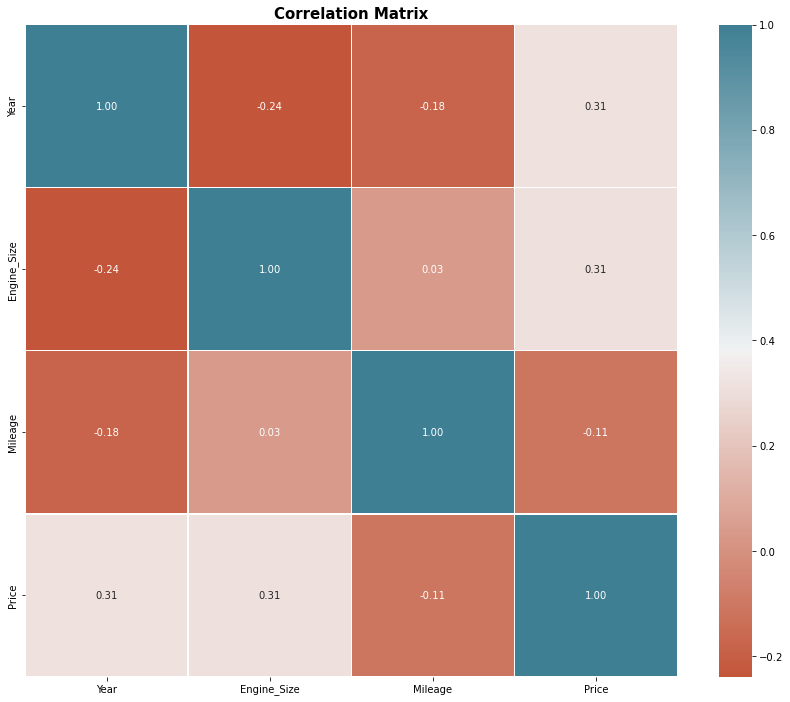

In [24]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

In [25]:
df.corr()

,Year,Engine_Size,Mileage,Price
Year,1.000000,-0.239041,-0.177634,0.313187
Engine_Size,-0.239041,1.000000,0.032220,0.308769
Mileage,-0.177634,0.032220,1.000000,-0.112628
Price,0.313187,0.308769,-0.112628,1.000000


*Correlation matrix* ditunjukkan untuk melihat hubungan setiap fitur dengan fitur `Price`. Korelasi paling tinggi dimiliki fitur `Year` dan `Engine_Size` di mana berkorelasi positif. Artinya, semakin baru/muda usia mobil maka harga mobil bekas semakin mahal dan semakin besar ukuran bahan bakar mobil maka semkain mahal pula harga mobil bekas.  

Selanjutnya, kita akan mengecek distribusi data dan *oulier* setiap fitur bertipe data numerikal.

### Outlier
Jumlah outlier dapat mempengaruhi hasil analisis dan pemodelan yang dilakukan. Kita perlu mempertimbangkan sisi *domain knowledge* sebelum mengurangi outlier apabila terjadi *skewness* yang tinggi.

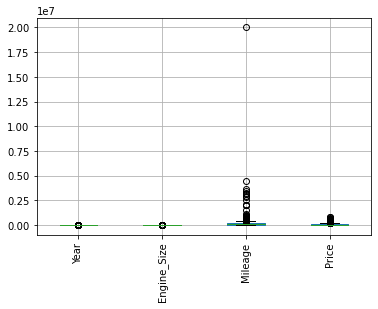

In [26]:
# Plot boxplot untuk mengecek outliers pada setiap data numerikal
df.boxplot(rot=90);

Dari grafik di atas, terlihat banyak outlier pada beberapa fitur. Untuk membersihkan outlier, akan dilakukan beberapa rekayasa data pada fitur dengan mempertimbangkan hasil **IQR** dan ***domain knowledge***. Model akan memprediksi dataset baru dengan rentang data yang sudah bersih.

In [27]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*3.0
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

#### Price

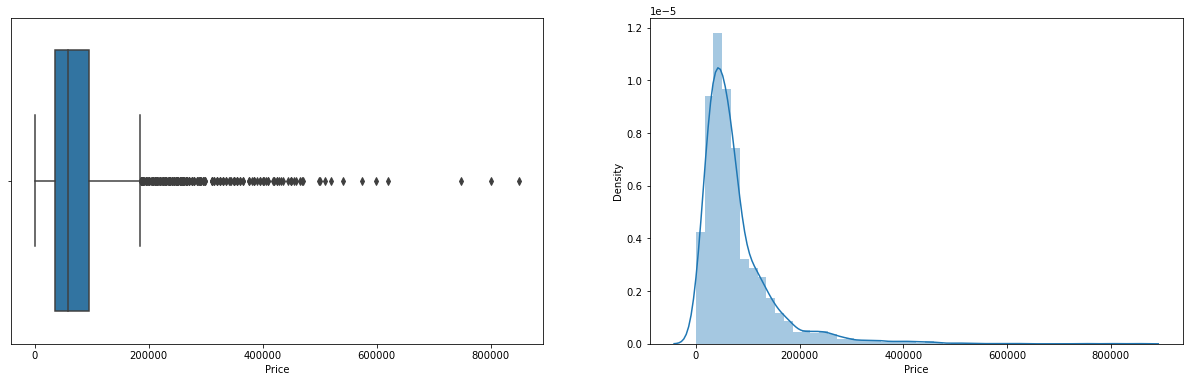

In [28]:
# Plot distribusi data sebelum filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.boxplot(data=df,x='Price', ax=axes[0])
sns.distplot(df['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Price');

- Grafik kiri adalah plot boxplot dari fitur `Price` sebelum dilakukan *filtering*,
- Grafik kanan adalah plot distribusi dari fitur `Price`.  

Dari kedua grafik tersebut, terlihat bahwa distribusi fitur `Price` adalah *positive skewness*.

In [29]:
# Outliers pada fitur price
find_anomalies(df['Price'])

IQR: 60000.0
limit_bawah: -145000.0
limit_atas: 275000.0


In [30]:
# Deskriptif statistik kolom `Price` sebelum filtering
df['Price'].describe()

count      3808.000000
mean      78107.823792
std       72835.209037
min           1.000000
25%       35000.000000
50%       58000.000000
75%       95000.000000
max      850000.000000
Name: Price, dtype: float64

In [31]:
# Cek Price < batas atas
len(df[df['Price']>275000.0])/len(df)

0.025210084033613446

In [32]:
# Cek nilai-nilai fitur Price sebelum filtering
df['Price'].value_counts().sort_index(ascending=False)

850000    1
800000    1
748000    1
620000    1
599000    1
         ..
950       1
884       1
850       1
500       1
1         1
Name: Price, Length: 466, dtype: int64

Berdasarkan informasi di atas, Terdapat 2.5% data yang bernilai lebih dari 275000.0 (batas atas dari `Price`). Jumlah itu tidak banyak dan mungkin saja ada mobil bekas dengan harga tersebut sehingga kita tidak perlu mengurangi data > batas atas. Berdasarkan *Syarah.com*, harga mobil yang dijual >= 5000 sehingga kita perlu melakukan *filtering* menggunakan fitur `Price` >= 5000.

In [33]:
# Cek banyaknya Price < 5000
len(df[df['Price']<5000])/len(df)

0.017857142857142856

Terdapat 1.79% data dengan fitur `Price` < 5000

In [34]:
# Melakukan filtering pada data
df=df[df['Price']>=5000]

In [35]:
# Cek nilai-nilai fitur Price setelah filtering
df['Price'].value_counts().sort_index(ascending=False)

850000    1
800000    1
748000    1
620000    1
599000    1
         ..
7000      5
6500      1
6000      1
5500      2
5000      5
Name: Price, Length: 404, dtype: int64

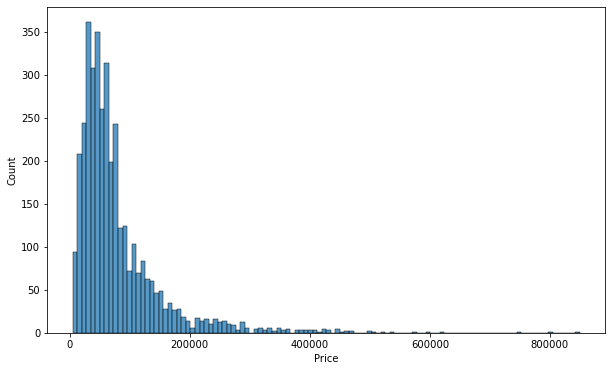

In [36]:
# Plot distribusi data Price setelah filtering
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Price');

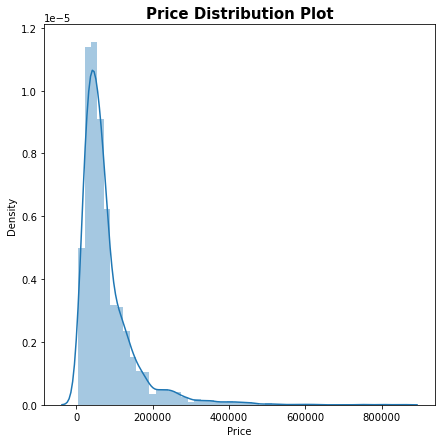

In [37]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Price'])
plt.title('Price Distribution Plot', size=15, weight='bold');

#### Mileage

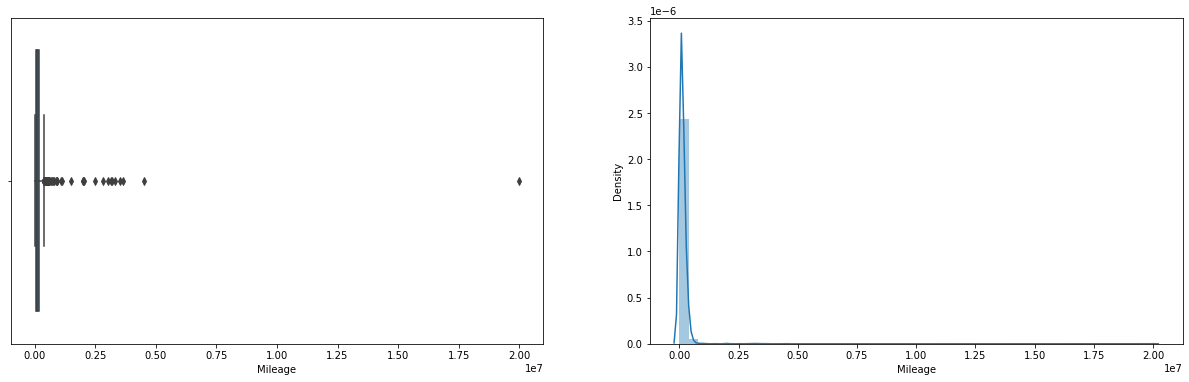

In [38]:
# Plot distribusi data sebelum filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.boxplot(data=df,x='Mileage', ax=axes[0])
sns.distplot(df['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Mileage');

- Grafik kiri adalah plot boxplot dari fitur `Mileage` sebelum dilakukan *filtering*,
- Grafik kanan adalah plot distribusi dari fitur `Mileage` sebelum *filtering*.  

Dari kedua grafik tersebut, terlihat bahwa distribusi fitur `Mileage` adalah *positive skewness*.

In [39]:
# Outliers pada fitur Mileage
find_anomalies(df['Mileage'])

IQR: 134655.75
limit_bawah: -354967.25
limit_atas: 587623.0


In [40]:
# Deskriptif statistik kolom `Mileage` sebelum filtering
df['Mileage'].describe()

count    3.740000e+03
mean     1.437573e+05
std      3.822508e+05
min      1.000000e+02
25%      4.900000e+04
50%      1.040000e+05
75%      1.836558e+05
max      2.000000e+07
Name: Mileage, dtype: float64

In [41]:
# Cek nilai-nilai fitur Mileage sebelum filtering
df['Mileage'].value_counts().sort_index(ascending=False)

20000000     1
4500000      1
3640000      1
3500000      1
3300000      1
            ..
109          1
108          1
107          2
105          3
100         11
Name: Mileage, Length: 1326, dtype: int64

Berdasarkan informasi di atas, nilai `Mileage` didominasi oleh nila<1000000. Terdapat outlier yang sangat jauh di mana nilai `Mileage`= 20000000 > 10000000 dan nilai jauh dari batas atas firut `Mileage`. Data yang memiliki nilai `Mileage`= 20000000 sebaiknya dihapus agar nilai-nilai `Mileage` dalam rentang yang sama.

In [42]:
# Melakukan filtering pada data
df=df[df['Mileage']<20000000]

In [43]:
# Cek nilai-nilai fitur Price setelah filtering
df['Mileage'].value_counts().sort_index(ascending=False)

4500000     1
3640000     1
3500000     1
3300000     1
3180003     1
           ..
109         1
108         1
107         2
105         3
100        11
Name: Mileage, Length: 1325, dtype: int64

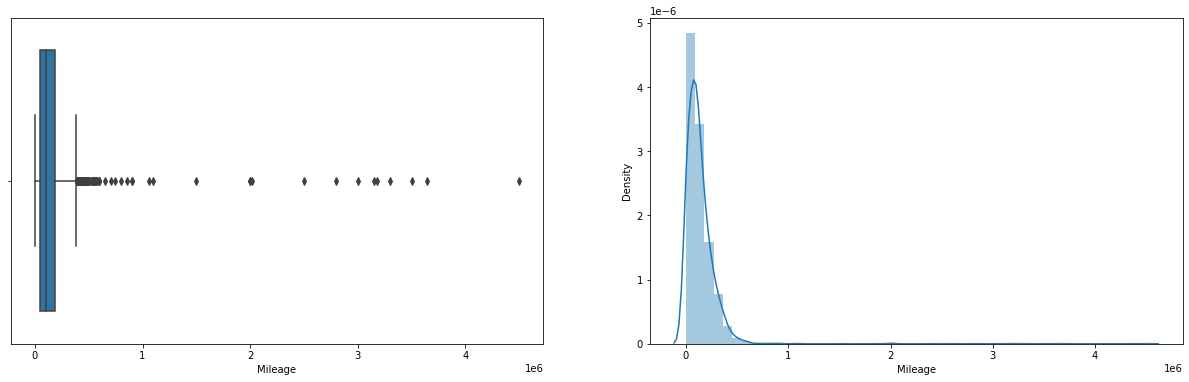

In [44]:
# Plot distribusi data setelah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.boxplot(data=df,x='Mileage', ax=axes[0])
sns.distplot(df['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Mileage');

- Grafik kiri adalah plot boxplot dari fitur `Mileage` setelah dilakukan *filtering*,
- Grafik kanan adalah plot distribusi dari fitur `Mileage` setelah *filtering*.  

Dari kedua grafik tersebut, terlihat bahwa distribusi fitur `Mileage` adalah *positive skewness*.

In [45]:
len(df[df['Mileage']>585548])/len(df)

0.007488633324418294

Berdasarkan informasi di atas, distribusi fitur `Mileage` *selection* adalah *positive skewness*. Terdapat 0.7% data yang bernilai lebih dari 585548.0 (batas atas dari `Mileage`). Jumlah itu tidak banyak dan mungkin saja ada mobil bekas dengan jarak yang ditempuh tersebut sehingga kita tidak perlu mengurangi data > batas atas.

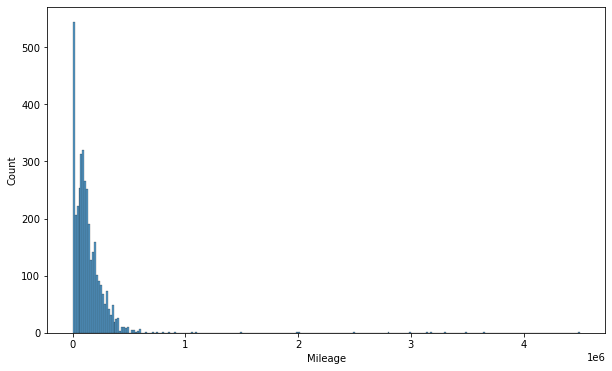

In [46]:
# Plot distribusi data setelah filtering
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Mileage');

#### Engine_Size

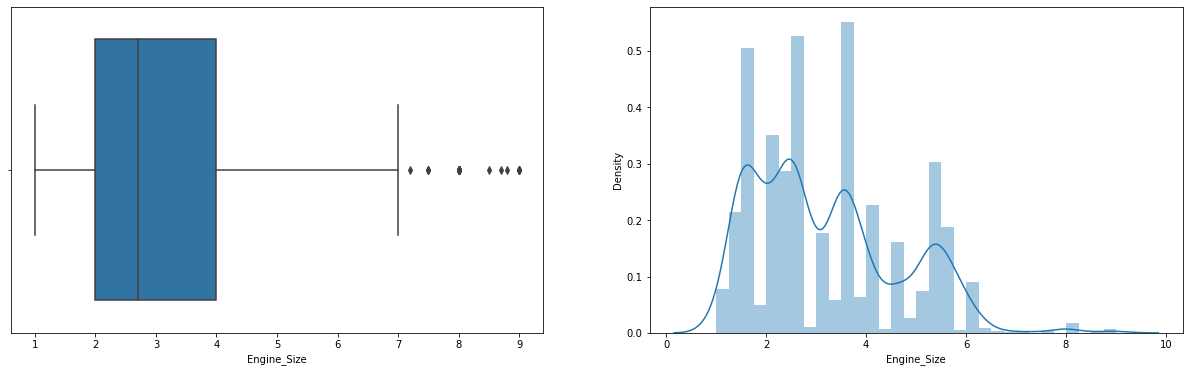

In [47]:
# Plot distribusi data sebelum filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.boxplot(data=df,x='Engine_Size', ax=axes[0])
sns.distplot(df['Engine_Size'], ax=axes[1])
axes[0].set_xlabel('Engine_Size')
axes[1].set_xlabel('Engine_Size');

- Grafik kiri adalah plot boxplot dari fitur `Engine_Size` sebelum dilakukan *filtering*,
- Grafik kanan adalah plot distribusi dari fitur `Engine_Size` sebelum *filtering*.  

Dari kedua grafik tersebut, terlihat bahwa distribusi fitur `Engine_Size` adalah tidak *skewness*.

In [48]:
# Outliers pada fitur engine size
find_anomalies(df['Engine_Size'])

IQR: 2.0
limit_bawah: -4.0
limit_atas: 10.0


In [49]:
# Deskriptif statistik kolom `Engine_Size` sebelum filtering
df['Engine_Size'].describe()

count    3739.000000
mean        3.188259
std         1.462169
min         1.000000
25%         2.000000
50%         2.700000
75%         4.000000
max         9.000000
Name: Engine_Size, dtype: float64

In [50]:
# Cek nilai-nilai fitur Mileage sebelum filtering
df['Engine_Size'].value_counts().sort_index(ascending=False)

9.0      6
8.8      1
8.7      1
8.5      1
8.0     17
      ... 
1.4    182
1.3     18
1.2     18
1.1      6
1.0     48
Name: Engine_Size, Length: 65, dtype: int64

Berdasarkan informasi di atas, terlihat bahwa fitur `Engine_Size` tidak memiliki outlier sehingga tidak diperlukan pengurangan data.

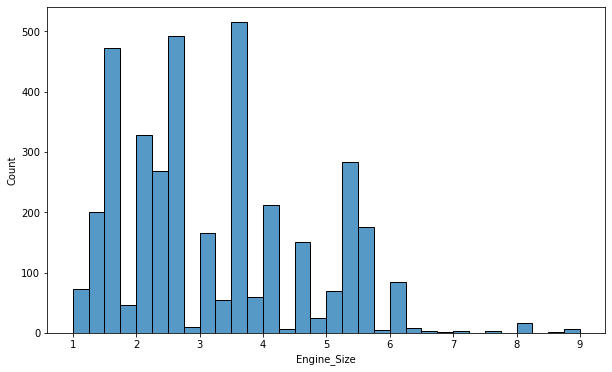

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Engine_Size');

#### Year

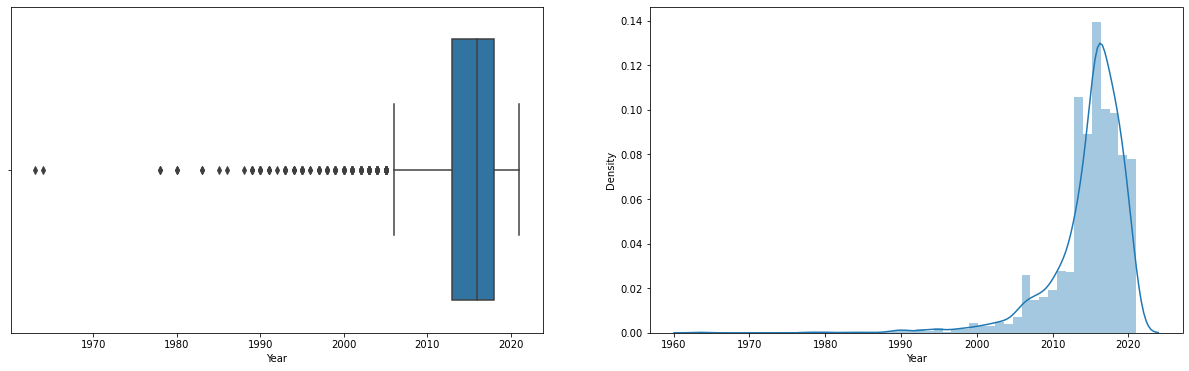

In [52]:
# Plot distribusi data sebelum filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.boxplot(data=df,x='Year', ax=axes[0])
sns.distplot(df['Year'], ax=axes[1])
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Year');

- Grafik kiri adalah plot boxplot dari fitur `Year` setelah dilakukan *filtering*,
- Grafik kanan adalah plot distribusi dari fitur `Year` setelah *filtering*.  

Dari kedua grafik tersebut, terlihat bahwa distribusi fitur `Year` adalah *negative skewness*.

In [53]:
# Outliers pada fitur year
find_anomalies(df['Year'])

IQR: 5.0
limit_bawah: 1998.0
limit_atas: 2033.0


In [54]:
# Deskriptif statistik kolom `Year` sebelum filtering
df['Year'].describe()

count    3739.000000
mean     2014.809842
std         5.085039
min      1963.000000
25%      2013.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: Year, dtype: float64

In [55]:
# Cek nilai-nilai fitur Year sebelum filtering
df['Year'].value_counts().sort_index(ascending=False)

2021     84
2020    253
2019    346
2018    427
2017    435
2016    604
2015    387
2014    249
2013    209
2012    119
2011    121
2010     83
2009     69
2008     63
2007     60
2006     52
2005     30
2004     18
2003     21
2002     14
2001     14
2000     10
1999      9
1998      7
1997      7
1996      2
1995      9
1994      4
1993      7
1992      1
1991      4
1990      6
1989      4
1988      1
1986      1
1985      1
1983      2
1980      2
1978      2
1964      1
1963      1
Name: Year, dtype: int64

In [56]:
# Cek banyaknya Year < limit bawah
len(df[df['Year']<1998])/len(df)

0.01470981545867879

Berdasarkan informasi di atas, distribusi fitur `Year` adalah *negative skewness*. Terdapat 1.5% data yang bernilai kurang dari 1998 (batas bawah dari `Year`). Jumlah itu tidak banyak dan mungkin saja ada mobil bekas yang keluar pada tahun tersebut sehingga kita tidak perlu mengurangi data < batas bawah.

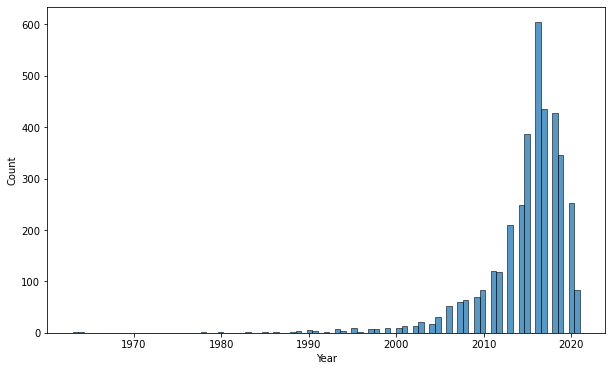

In [57]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Year');

### Clean Dataset

In [58]:
# Cek dataset yang sudah bersih
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


In [59]:
# Cek kembali info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3739 entries, 1 to 5622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3739 non-null   object 
 1   Region       3739 non-null   object 
 2   Make         3739 non-null   object 
 3   Gear_Type    3739 non-null   object 
 4   Origin       3739 non-null   object 
 5   Options      3739 non-null   object 
 6   Year         3739 non-null   int64  
 7   Engine_Size  3739 non-null   float64
 8   Mileage      3739 non-null   int64  
 9   Price        3739 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 481.3+ KB


In [60]:
len(df)/len(da)

0.6648293029871978

Dataset yang sudah bersih dan siap digunakan untuk modeling adalah 66.48% data asli.

# Data Preprocessing

## Data Splitting
Memisahkan data independen variabel dengan target/label

In [61]:
X=df.drop(columns='Price')
y=df['Price']

Memisahkan data menjadi **data train** dan **data test** dengan proporsi 0.8:0.2

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2020)

## Transformer (Preprocessing)
Agar dapat menggunakan semua fitur yang dipilih, **fitur kategorikal** harus diubah menjadi data numerik (*Encoding*). Selain itu, agar hasil prediksi baik, alangkah baiknya range **fitur numerikal** dalam range yang sama (*Scaling*). Kita dapat menggunakan **ColumnTransformer** untuk mengaplikasikan *encoding* dan *scaling*, yang nantinya dapat diaplikasikan pada **pipeline model**.  

* *Robust Scaling*: `Mileage`
* *Onehot Encoding*: `Gear_Type`, `Origin`, `Options`
* *Binary Encoding*: `Type`,`Region`,`Make`

In [63]:
# Cek dataset kembali
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,85000


In [64]:
# Cek banyaknya unique value dari fitur bertipe data kategorikal
print(f'Type:{df["Type"].nunique()}')
print(f'Region:{df["Region"].nunique()}')
print(f'Make:{df["Make"].nunique()}')
print(f'Gear_Type:{df["Gear_Type"].nunique()}')
print(f'Origin:{df["Origin"].nunique()}')
print(f'Options:{df["Options"].nunique()}')

Type:318
Region:27
Make:56
Gear_Type:2
Origin:3
Options:3


Bardasarkan informasi di atas, kita dapat melakukan:  
1. ***Onehot encoding*** pada fitur `Gear_Type`, `Origin`, dan `Options` karena jumlah *unique value* dari masing-masing fitur <= 5 dan tidak memiliki tingkatan,
2. ***Binary encoding*** pada fitur `Type`, `Region`, dan `Make` karena jumlah *unique value* dari masing-masing fitur > 5 dan tidak memiliki tingkatan.

In [65]:
# ColumnTransform: encoding & scaling

transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['Mileage']),
    ('onehot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('binary', ce.BinaryEncoder(),['Type','Region','Make'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', RobustScaler(), ['Mileage']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Options']),
                                ('binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make'])])

In [66]:
# Cek apakah preprocessing data sudah bertransform dengan baik ke setiap fiturnya
transformer.fit_transform(X)

array([[-1.78743656e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  2.01400000e+03,  8.00000000e+00],
       [ 2.68115483e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.01500000e+03,  5.00000000e+00],
       [ 8.63927668e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  2.01500000e+03,  2.40000000e+00],
       ...,
       [-1.87725524e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.01800000e+03,  2.50000000e+00],
       [-4.17068530e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  2.01600000e+03,  5.30000000e+00],
       [-1.71296003e-01,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  2.01600000e+03,  2.50000000e+00]])

# Modeling

## Benchmark Model
Pemilihan algoritma/model terbaik.  
* Terdapat 4 **based model**:
    * Linear Regression
    * K-Nearest Neighbors Regression (KNN)
    * Decision Tree Regression
    * Support Vector Machine Regression (SVM)
* Terdapat 4 **ensemble model**:
    * Similar Type:
        * Bagging: Random Forest
        * Boosting: XG Boosting, Ada Boosting, Gradient Boosting

In [67]:
# Define algoritma yang digunakan

lr = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor()
svm = SVR()
rf = RandomForestRegressor()
xgb = XGBRegressor()
adab = AdaBoostRegressor()
gradb = GradientBoostingRegressor()

In [68]:
# Mencari algoritma/model terbaik

# Kadidat algoritma model yang sudah didefinisikan sebelumnya
models = [lr, knn, tree, rf, xgb, adab, gradb, svm]

# Define Evaluation Metrics
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Cross validation
skfold=StratifiedKFold() #defaultnya 5

# Mencari algoritma terbaik berdasarkan metrics
for i in models:
    estimator=Pipeline([
    ('preprocessing',transformer),
    ('model',i)
])
    # RMSE
    model_cv_rmse=cross_val_score(estimator,X_train,y_train, cv=skfold, scoring='neg_root_mean_squared_error')
    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae=cross_val_score(estimator,X_train,y_train, cv=skfold, scoring='neg_mean_absolute_error')
    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())
    
    # MAPE
    model_cv_mape=cross_val_score(estimator,X_train,y_train, cv=skfold, scoring='neg_mean_absolute_percentage_error')
    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

# Evaluasi hasil dari 9 kadidat algoritma yang digunakan
fold_DF=pd.DataFrame({
        'Model':['Linear Regression','KNN','Decision Tree','Random Forest', 'XGBoost', 'AdaBoost', 'GradientBoost', 'SVM'],
        'Mean MAPE':nilai_mean_mape,
        'Std MAPE':nilai_std_mape,
        'Mean RMSE':nilai_mean_rmse,
        'Std RMSE':nilai_std_rmse,
        'Mean MAE':nilai_mean_mae,
        'Std MAE':nilai_std_mae
}).sort_values('Mean MAPE', ascending=False)

fold_DF

,Model,Mean MAPE,Std MAPE,Mean RMSE,Std RMSE,Mean MAE,Std MAE
4,XGBoost,-0.284639,0.015604,-36766.492162,5341.250639,-18463.775568,764.017706
1,KNN,-0.290665,0.013336,-38373.174212,7422.331698,-18426.682618,1076.136617
3,Random Forest,-0.299847,0.017033,-37975.520755,7293.713161,-18955.217166,1060.258795
6,GradientBoost,-0.356636,0.031326,-40645.848551,7268.838636,-22182.651327,1777.168353
2,Decision Tree,-0.367492,0.034140,-53943.841730,2840.342026,-25178.091139,1033.625393
0,Linear Regression,-0.677894,0.043756,-56210.475993,5086.428992,-34660.285675,566.310107
7,SVM,-0.720589,0.015460,-75590.254799,5830.700199,-43995.282534,1448.129310
5,AdaBoost,-1.465096,0.155534,-70574.764539,5397.811217,-62807.951863,4644.631815


Ada perbedaan yang cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.  

Berdasarkan nilai MAPE dan RMSE, model **XGBoost** memiliki nilai error paling rendah. Sedangkan, berdasarkan nilai MAE, model **KNN** memiliki nilai terendah.  

Selanjutnya, akan dilakukan prediksi pada test set dengen kadidat model yang sama.

In [69]:
# Prediksi pada test set

# Kadidat algoritma model yang sudah didefinisikan sebelumnya
test_model=[lr, knn, tree, rf, xgb, adab, gradb, svm]

# Define Evaluation Metrics
score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Melakukan prediksi dan mencari algoritma terbaik berdasarkan metrics
for cek in test_model:
    test_estimator = Pipeline([
    ('preprocessing',transformer),
    ('model',cek)
])
    
    test_estimator.fit(X_train, y_train)
    y_pred = test_estimator.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

# Evaluasi hasil prediksi dari 9 kadidat algoritma yang digunakan
test_DF=pd.DataFrame({
        'Model':['Linear Regression','KNN','Decision Tree','Random Forest', 'XGBoost', 'AdaBoost', 'GradientBoost', 'SVM'],
        'MAPE':score_mape,
        'RMSE':score_rmse,
        'MAE':score_mae
}).sort_values('MAPE', ascending=True)

test_DF

,Model,MAPE,RMSE,MAE
3,Random Forest,0.285861,33647.223583,17933.163098
4,XGBoost,0.293093,30996.711225,18081.550635
1,KNN,0.296317,33485.219928,17681.117647
2,Decision Tree,0.322717,44023.026493,22169.453209
6,GradientBoost,0.360506,38740.621970,23176.970259
0,Linear Regression,0.668895,54773.371735,33623.562634
7,SVM,0.700123,74796.581215,41839.700358
5,AdaBoost,1.895912,82979.170871,76935.716641


Ketika dilakukan modeling dan prediksi pada test set, untuk nilai performa MAPE terbaik adalah model **Random Forest**. Model dengan nilai performa MAPE yang terbaik kedua adalah model **XGBoost**. Sedangkan nilai RMSE terbaik adalah model **XGBoost** dan nilai performa MAE terbaik adalah **KNN**.

## Hyperparameter Tuning

### Tuning XGBoost
Karena model **XGBoost** memiliki performa adalah model terbaik saat modelling dan menjadi model performa kedua saat prediksi maka dilakukan *hyperparameter tuning* pada model **XGBoost** diharapkan dapat meningkatkan performa model.

In [76]:
# Algoritma memberi saran range parameter untuk random search parameter
from jcopml.tuning import random_search_params as rsp

rsp.xgb_params

{'algo__max_depth': Integer(low=1, high=10),
 'algo__learning_rate': Real(low=-2, high=0, prior='log-uniform'),
 'algo__n_estimators': Integer(low=100, high=200),
 'algo__subsample': Real(low=0.3, high=0.8, prior='uniform'),
 'algo__gamma': Integer(low=1, high=10),
 'algo__colsample_bytree': Real(low=0.1, high=1, prior='uniform'),
 'algo__reg_alpha': Real(low=-3, high=1, prior='log-uniform'),
 'algo__reg_lambda': Real(low=-3, high=1, prior='log-uniform')}

In [80]:
# definisi hyperparameter sesuai output algoritma sebelumnya
hyperparam_xgb = {
    'model__max_depth': range(1,11),
    'model__colsample_bytree': list(np.arange(1, 10)/10),
    'model__n_estimators': range(100, 201,20),
    'model__subsample': [0.4, 0.6, 0.8],
    'model__gamma': range(1,10),
    'model__learning_rate': [0.01, 0.1, 1],
    'model__reg_alpha': list(np.logspace(-3, 1, 10)),
    'model__reg_lambda': list(np.logspace(-3, 1, 10))
}

In [84]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor()

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

skfold=StratifiedKFold() #defaultnya 5

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator=estimator_xgb, 
    param_distributions = hyperparam_xgb,
    cv = skfold, 
    scoring = 'neg_mean_absolute_percentage_error', 
    n_jobs = -1,
    n_iter = 50,
    refit = 'neg_mean_absolute_percentage_error' # Hanya bisa memilih salah stau metric untuk optimisasi
)

In [85]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               RobustScaler(),
                                                                               ['Mileage']),
                                                                              ('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
             

In [86]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAPE, MAE, dan RMSE
pd.DataFrame(random_xgb.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_lambda,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,...,param_model__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,10.883140,1.835891,0.141170,0.088343,0.6,3.59381,0.0599484,200,8,0.01,...,0.7,"{'model__subsample': 0.6, 'model__reg_lambda':...",-0.241830,-0.274066,-0.250818,-0.267317,-0.274454,-0.261697,0.013118,1
13,5.045355,1.727754,0.190361,0.121463,0.8,0.464159,0.00278256,120,6,0.1,...,0.9,"{'model__subsample': 0.8, 'model__reg_lambda':...",-0.252487,-0.266714,-0.262358,-0.257128,-0.318428,-0.271423,0.023986,2
17,6.369383,1.340281,0.256914,0.151718,0.8,0.16681,0.464159,200,5,0.1,...,0.9,"{'model__subsample': 0.8, 'model__reg_lambda':...",-0.263728,-0.264813,-0.258087,-0.264805,-0.333233,-0.276933,0.028260,3
8,8.127213,1.253905,0.179384,0.117779,0.6,0.0215443,10,180,7,0.1,...,0.8,"{'model__subsample': 0.6, 'model__reg_lambda':...",-0.256184,-0.278765,-0.260423,-0.265079,-0.326472,-0.277385,0.025691,4
45,10.786340,1.618167,0.357758,0.135238,0.6,0.00278256,0.00278256,180,8,0.1,...,0.8,"{'model__subsample': 0.6, 'model__reg_lambda':...",-0.263517,-0.276505,-0.274686,-0.259426,-0.313988,-0.277624,0.019300,5


In [87]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -0.26169683306605745
Best_params: {'model__subsample': 0.6, 'model__reg_lambda': 3.593813663804626, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 200, 'model__max_depth': 8, 'model__learning_rate': 0.01, 'model__gamma': 1, 'model__colsample_bytree': 0.7}


#### Predict to Test Set dengan Tuned Model
Model XGBoost dengan hyperparameter yang terpelih akan melakukan prediksi pada data test

In [101]:
# Model XGBoost
model = xgb

# Define model terhadap estimator terbaik
xgb_tuning_random = random_xgb.best_estimator_

# Fitting model
xgb_tuning_random.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning_random = xgb_tuning_random.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning_random))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning_random)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning_random)

score_after_tuning = pd.DataFrame({'Model': ['XGBoost tuning random'], 'MAPE': mape_xgb_tuning, 'MAE': mae_xgb_tuning, 'RMSE': rmse_xgb_tuning})
score_after_tuning

,Model,MAPE,MAE,RMSE
0,XGBoost tuning random,0.249326,21027.48549,41922.808765


### Tuning Random Forest
Karena model **Random Forest** memiliki performa adalah model terbaik saat*predicting* maka dilakukan *hyperparameter tuning* pada model **Random Forest** diharapkan dapat meningkatkan performa model.

In [89]:
# Algoritma memberi saran range parameter untuk random search parameter
rsp.rf_params

{'algo__n_estimators': Integer(low=100, high=200),
 'algo__max_depth': Integer(low=20, high=80),
 'algo__max_features': Real(low=0.1, high=1, prior='uniform'),
 'algo__min_samples_leaf': Integer(low=1, high=20)}

In [95]:
# definisi hyperparameter sesuai output algoritma sebelumnya
hyperparam_rf = {
    'model__max_depth': range(100,200),
    'model__n_estimators': range(20, 81),
    'model__max_features': list(np.arange(1, 10)/10),
    'model__min_samples_leaf': range(1,20,2)
}

In [96]:
# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor()

# Membuat algorithm chains
estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('model', rf)
        ])

skfold=StratifiedKFold() #defaultnya 5

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator=estimator_rf, 
    param_distributions = hyperparam_rf,
    cv = skfold, 
    scoring = 'neg_mean_absolute_percentage_error', 
    n_jobs = -1,
    n_iter = 50,
    refit = 'neg_mean_absolute_percentage_error' # Hanya bisa memilih salah stau metric untuk optimisasi
)

In [97]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               RobustScaler(),
                                                                               ['Mileage']),
                                                                              ('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
             

In [98]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAPE, MAE, dan RMSE
pd.DataFrame(random_rf.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,1.320093,0.009989,0.057863,0.002854,59,1,0.9,174,"{'model__n_estimators': 59, 'model__min_sample...",-0.299150,-0.311684,-0.282862,-0.289813,-0.337360,-0.304174,0.019201,1
1,0.826399,0.025330,0.051085,0.004823,54,1,0.6,107,"{'model__n_estimators': 54, 'model__min_sample...",-0.281936,-0.314937,-0.292845,-0.294361,-0.343005,-0.305417,0.021611,2
6,0.421104,0.006457,0.048282,0.004727,29,3,0.6,173,"{'model__n_estimators': 29, 'model__min_sample...",-0.299050,-0.321150,-0.291408,-0.301174,-0.327805,-0.308118,0.013908,3
24,1.161743,0.040525,0.069730,0.005149,66,1,0.5,137,"{'model__n_estimators': 66, 'model__min_sample...",-0.285332,-0.314737,-0.289788,-0.308171,-0.343713,-0.308348,0.020812,4
43,0.891914,0.259462,0.122112,0.030760,36,5,0.7,182,"{'model__n_estimators': 36, 'model__min_sample...",-0.308639,-0.313700,-0.292256,-0.316776,-0.345811,-0.315436,0.017384,5


In [99]:
# Cek skor dan params terbaik
print('Random_Forest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random_Forest
Best_score: -0.30417407613184705
Best_params: {'model__n_estimators': 59, 'model__min_samples_leaf': 1, 'model__max_features': 0.9, 'model__max_depth': 174}


#### Predict to Test Set dengan Tuned Model
Model Random Forest dengan hyperparameter yang terpelih akan melakukan prediksi pada data test

In [102]:
# Model XGBoost
model = rf

# Define model terhadap estimator terbaik
rf_tuning_random = random_rf.best_estimator_

# Fitting model
rf_tuning_random.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning_random = rf_tuning_random.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning_random))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning_random)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning_random)

score_after_tuning = pd.DataFrame({'Model': ['Random Forest tuning random'], 'MAPE': mape_rf_tuning, 'MAE': mae_rf_tuning, 'RMSE': rmse_rf_tuning})
score_after_tuning

,Model,MAPE,MAE,RMSE
0,Random Forest tuning random,0.291361,18310.84035,34049.096689


### Hasil Prediksi Model Terbaik Setelah Tuning

In [103]:
pd.DataFrame({'Model': ['XGBoost Regressor', 'Random Forest Regressor'], 'MAPE': [mape_xgb_tuning, mape_rf_tuning], 'MAE': [mae_xgb_tuning, mae_rf_tuning], 'RMSE': [rmse_xgb_tuning, rmse_rf_tuning]})

,Model,MAPE,MAE,RMSE
0,XGBoost Regressor,0.249326,21027.48549,41922.808765
1,Random Forest Regressor,0.291361,18310.84035,34049.096689


Dari kedua model yang dilakukan *tuning*, model **XGBoost** memiliki nilai performa MAPE lebih tinggi dibandingkan **Random Forest**.  

- Nilai performa MAPE model **XGBoost Regressor** sebelum tuning: **29.30%**
- Nilai performa MAPE model **XGBoost Regressor** setelah tuning: **24.93%**

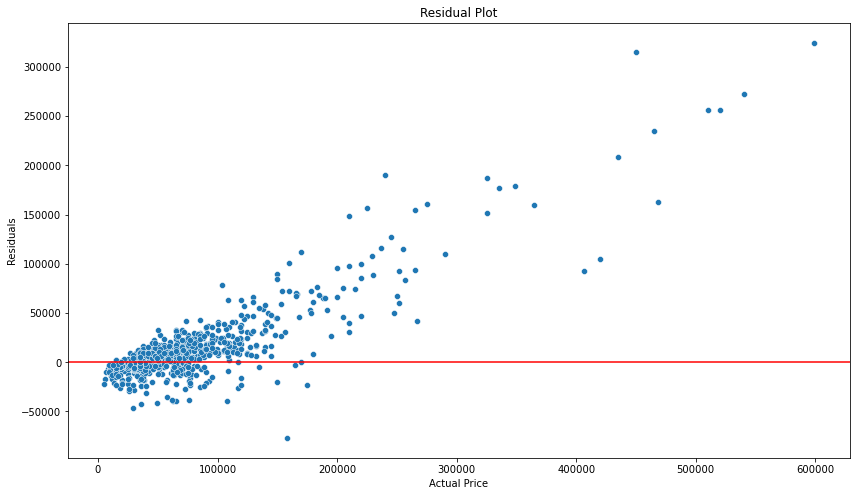

In [105]:
plt.figure(figsize=(14, 8))
residuals = y_test - y_pred_xgb_tuning_random
plot = sns.scatterplot(x=y_test, y=residuals).set(title='Residual Plot', 
                                                 xlabel='Actual Price', 
                                                 ylabel='Residuals')
plt.axhline(y=0, color='red')

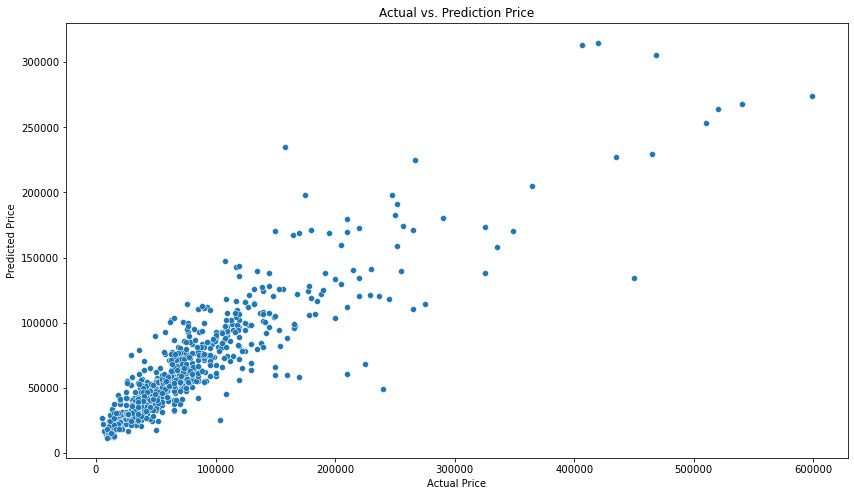

In [107]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning_random).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE yang tergambarkan pada plot di atas. Terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 24% menjadikan model ini dapat dikategorikan ke dalam *reasonable forecasting*.

# Conclusion

- Berdasarkan pemodelan yang sudah dilakukan, fitur `Year` dan `Engine_Size` memiliki hubungan yang cukup tinggi dengan fitur `Price`.  


- *Evaluation matrix* yang digunakan pada model ini adalah nilai MAPE, MAE, dan RMSE. Nilai yang ditinjau model setelah *tuning* adalah nilai **MAPE** sebesar **-24.9%**. Kita dapat menyimpulkan bahwa jika model yang kita buat akan digunakan untuk memperkirakan harga mobil bekas baru di *Syarah.com* sesuai dengan rentang nilai seperti yang dilatih pada model (>=5000) maka perkiraan harga rata-rata akan meleset kurang lebih sebesar 25% dari harga seharusnya.  


- Model ini tidak menutup kemungkinan bahwa hasil prediksi meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias terjadi karena model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek detail mobil bekas seperti jarak tempuh, besar bahan bakar, tahun terbuat, sudah dimodif atau belum, merek dan tipe mobil. Terdapat pula aspek di luar detail mobil seperti asal mobil dan kota mobil dijual.  


- Model ini tentu masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi.  

# Recommendation

Lakukan A/B testing untuk menguji tingkat efektivitas model terhadap lakunya mobil bekas jika dibandingkan pemilik mobil yang menentukan harga sendiri.  

Model juga dapat dikembangkan lebih lanjut agar menghasilkan performa lebih baik, seperti:

* Dapat mencoba model ensemble lainnya seperti stacking atau model booster dengan model estimator berbeda,  


* Jika dilakukan penambahan jumlah data, kita dapat menggunakan model yang lebih kompleks seperti (RNN) atau model-model kompleks lainnya.  


* Model yang telah dibuat, dapat kita gunakan untuk mengembangkan model lain.


In [108]:
# Save Model

import pickle

In [109]:
estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_Used_Car_XGB.sav', 'wb'))

In [110]:
# Load model
filename = 'Model_Used_Car_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [112]:
np.sqrt(mean_absolute_percentage_error(y_test, loaded_model.predict(X_test)))

0.5413805330842941